In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
from google.colab import files
uploaded = files.upload()


Saving train_data.txt to train_data.txt


In [70]:
train_p = "train_data.txt"
train_d = pd.read_csv(train_p, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python").reset_index(drop=True)

In [71]:
train_d


,TITLE,GENRE,DESCRIPTION
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [72]:
train_d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [73]:
train_d.describe()


,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [74]:
train_d.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [10]:
uploaded = files.upload()


Saving test_data.txt to test_data.txt


In [75]:
test_p= "test_data.txt"
test_d= pd.read_csv(train_p, sep=":::", names=["ID","TITLE","DESCRIPTION"], engine="python").reset_index(drop=True)

In [76]:
test_d


,ID,TITLE,DESCRIPTION
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [77]:
test_d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  object
 1   TITLE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


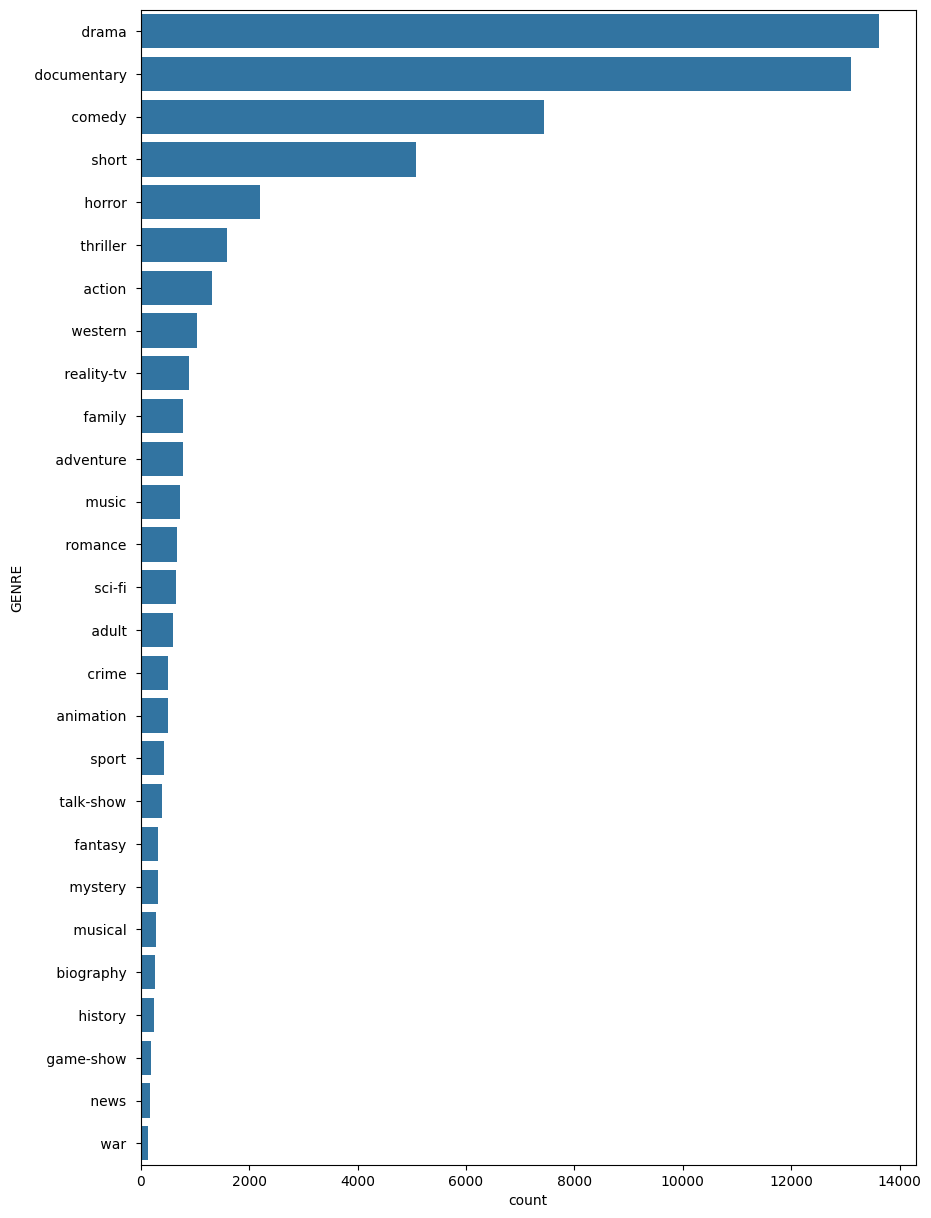

In [78]:
plt.figure(figsize=(10, 15))
sns.countplot(data=train_d, y="GENRE", order=train_d["GENRE"].value_counts().index)
plt.show()

<ipython-input-79-bda3b56f572e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=train_d,x='GENRE',order=train_d.GENRE.value_counts().index,palette='rocket')


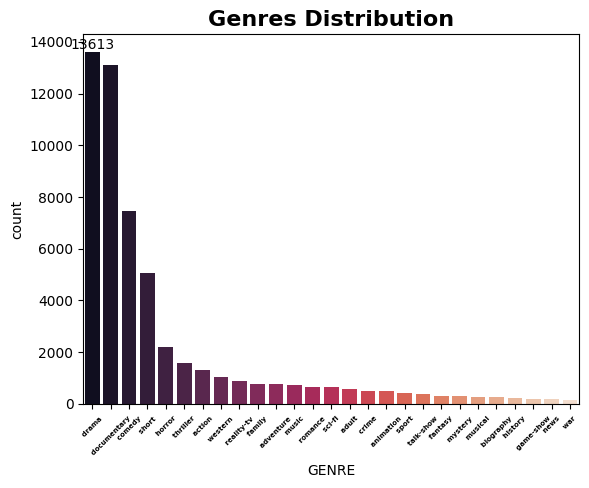

In [79]:
ax=sns.countplot(data=train_d,x='GENRE',order=train_d.GENRE.value_counts().index,palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Genres Distribution',fontweight='bold',fontsize=16)
plt.xticks(rotation=45,fontweight='bold',fontsize=5)
plt.show()

In [81]:
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
stemmer = LancasterStemmer()

def d_cleaning(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

train_d["TextCleaning"] = train_d["DESCRIPTION"].apply(d_cleaning)
test_d["TextCleaning"] = test_d["DESCRIPTION"].apply(d_cleaning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
train_d


,TITLE,GENRE,DESCRIPTION,Dest_len,TextCleaning
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listening conversation doctor parents year old...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empties students field trip museum natural...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemployed father make ends meet edith tw...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film title refers recovered bodies ground zero...
...,...,...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,507,short lived nbc live sitcom centered bonino wo...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,781,next generation exploitation sisters kapa bay ...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",255,bestaan echt stand comedy growing facing fears...
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,642,walter vivian live country difficult time keep...


In [83]:
vect = TfidfVectorizer()
x_train = vect.fit_transform(train_d["TextCleaning"])
x_test = vect.transform(test_d["TextCleaning"])

In [84]:
x = x_train
y = train_d["GENRE"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [86]:
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
accuracy = accuracy_score(y_train,y_pred_train)
accuracy

0.7174148624657029

In [89]:
new_descriptions = [
    "In a dystopian future, a hero rises to save the world."
]

new_descriptions_cleaned = [d_cleaning(desc) for desc in new_descriptions]

new_descriptions_vectorized = vect.transform(new_descriptions_cleaned)

predicted_genres = clf.predict(new_descriptions_vectorized)

for desc, genre in zip(new_descriptions, predicted_genres):
    print(f"Description: {desc}")
    print(f"Predicted Genre: {genre}")
    print()


Description: In a dystopian future, a hero rises to save the world.
Predicted Genre:  action 

